# Welcome

This notebook shall answer assignment_1b question 3.

# Table of Contents <a name="toc"></a>

* [Imports](#imports)
* [Global](#global)
* [Helper Functions](#helper_functions)
* [Question 3: N-Layer and Dropout](#n_layer_and_dropout)
    * [Model Parameters](#model_parameters)
    * [Create the Model](#create_the_model)
    * [4-Layer](#4_layer)    
        * [Run the Model](#run_the_model_4)
    * [4-Layer Dropout](#4_layer_dropout)
        * [Run the Model](#run_the_model_4_dropout)
    * [5-Layer](#5_layer)
        * [Run the Model](#run_the_model_5)
    * [5-Layer Dropout](#5_layer_dropout)
        * [Run the Model](#run_the_model_5_dropout)
    * [Save Data Objects](#save_data_objects)
    * [Plot Model Performance](#plot_model_performance)
    * [Comparing Models](#comparing_models)
    * [Eyeballing RFE Feature Space](#eyeballing_rfe_feature_space)
* [Conclusion](#conclusion)

# Imports <a name="imports"></a> 
[Back to top](#toc)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import itertools

from tensorflow import keras
from tqdm.keras import TqdmCallback
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
Y_train = np.load('data/Y_train.npy')
Y_test = np.load('data/Y_test.npy')
print("Data loaded")

Data loaded


# Global <a name="global"></a> 
[Back to top](#toc)

In [3]:
seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

# data objects
histories = {}
removed_features = {}

# Helper Functions <a name="helper_functions"></a> 
[Back to top](#toc)

### plot_history_object()

In [4]:
def plot_history_object(histories, model_name, history_object, max=None):   
    if max == None:
        plt.plot(histories[model_name][history_object], label='train_'+history_object)
#         plt.plot(histories[model_name]['val_'+history_object], label='val_'+history_object)
    else:
        plt.plot(histories[model_name][history_object][:max], label='train_'+history_object)
#         plt.plot(histories[model_name]['val_'+history_object][:max], label='val_'+history_object)
    plt.ylabel(history_object)
    plt.xlabel('No. epoch')
    plt.legend(loc="center right")
    plt.show()

### histories_saver()

In [5]:
# filename like 'data/histories_q1.json'
def histories_saver(histories, filename):
    histories_json = {}
    for key in histories.keys():
        histories_json[key] = histories[key].history

    with open(filename, 'w') as file:
        json.dump(histories_json, file)

    print("Histories saved")

# Question 3: N-Layer and Dropout  <a name="n_layer_and_dropout"></a>
[Back to top](#toc)

<i>Design a four-layer neural network and a five-layer neural network, with the hidden layers having 50 neurons each. Use a learning rate of 10-3 for all layers and optimal feature set selected in part (3). Introduce dropouts (with a keep probability of 0.8) to the layers and report the accuracies. Compare the performances of all the networks (with and without dropouts) with each other and with the 3-layer network.</i>

### Model Parameters <a name="model_parameters"></a> 
[Back to top](#toc)

In [6]:
num_neurons = 50 

weight_decay_parameter = 10e-3
regularization = keras.regularizers.l2(weight_decay_parameter)
dropout_rate = 0.2

optimizer = 'sgd'
loss = keras.losses.MeanSquaredError()
metrics = ['mse']

epochs = 40 # from assignment_1b_q1
learning_rate = 10e-3
batch_size = 8

# callbacks = [TqdmCallback(verbose=1)]
# callbacks = [TqdmCallback(verbose=1), tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)]

print("Model Parameters set")

Model Parameters set


The optimal feature set from assignment_1b q2 was the feature ```CGPA``` alone. We shall truncate the data as such 

In [7]:
X_train_truncated = X_train[:,5]
X_test_truncated = X_test[:,5]
print("X_train_truncated, X_test_truncated generated")

X_train_truncated, X_test_truncated generated


### Create the model <a name="create_the_model"></a> 
[Back to top](#toc)

In [8]:
def create_model_4(num_neurons, regularization, optimizer, loss, metrics):
    model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization),
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization),
        keras.layers.Dense(1, activation='linear')
    ])
    
    model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
    
    print("Model created")
    return model

def create_model_4_dropout(num_neurons, regularization, optimizer, loss, metrics, dropout_rate, seed):
    model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization),
        keras.layers.Dropout(rate=dropout_rate, seed=seed),
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization),
        keras.layers.Dropout(rate=dropout_rate, seed=seed),
        keras.layers.Dense(1, activation='linear')
    ])
    
    model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
    
    print("Model created")
    return model

def create_model_5(num_neurons, regularization, optimizer, loss, metrics):
    model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization),
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization),
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization),
        keras.layers.Dense(1, activation='linear')
    ])
    
    model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
    
    print("Model created")
    return model

def create_model_5_dropout(num_neurons, regularization, optimizer, loss, metrics, dropout_rate, seed):
    model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization),
        keras.layers.Dropout(rate=dropout_rate, seed=seed),
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization),
        keras.layers.Dropout(rate=dropout_rate, seed=seed),
        keras.layers.Dense(num_neurons, activation='relu', kernel_regularizer=regularization),
        keras.layers.Dropout(rate=dropout_rate, seed=seed),
        keras.layers.Dense(1, activation='linear')
    ])
    
    model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
    
    print("Model created")
    return model

## 4-Layer <a name="4_layer"></a> 
[Back to top](#toc)

### Run the model <a name="run_the_model_4"></a> 
[Back to top](#toc)

In [9]:
model_4_layer = create_model_4(num_neurons, regularization, optimizer, loss, metrics)

callbacks = [TqdmCallback(verbose=1)]
model_name = '4_layer'

histories[model_name] = model_4_layer.fit(X_train_truncated, Y_train,
                                        validation_split=0.3,
                                        epochs=epochs,
                                        verbose = 0,
                                        batch_size=batch_size,
                                        callbacks=callbacks)

Model created


In [10]:
model_4_layer_dropout = create_model_4_dropout(num_neurons, regularization, optimizer, loss, metrics, dropout_rate, seed)

callbacks = [TqdmCallback(verbose=1)]
model_name = '4_layer_dropout'

histories[model_name] = model_4_layer_dropout.fit(X_train_truncated, Y_train,
                                        validation_split=0.3,
                                        epochs=epochs,
                                        verbose = 0,
                                        batch_size=batch_size,
                                        callbacks=callbacks)

Model created


In [11]:
model_5_layer = create_model_5(num_neurons, regularization, optimizer, loss, metrics)

callbacks = [TqdmCallback(verbose=1)]
model_name = '5_layer'

histories[model_name] = model_5_layer.fit(X_train_truncated, Y_train,
                                        validation_split=0.3,
                                        epochs=epochs,
                                        verbose = 0,
                                        batch_size=batch_size,
                                        callbacks=callbacks)

Model created


In [12]:
model_5_layer_dropout = create_model_5_dropout(num_neurons, regularization, optimizer, loss, metrics, dropout_rate, seed)

callbacks = [TqdmCallback(verbose=1)]
model_name = '5_layer_dropout'

histories[model_name] = model_5_layer_dropout.fit(X_train_truncated, Y_train,
                                        validation_split=0.3,
                                        epochs=epochs,
                                        verbose = 0,
                                        batch_size=batch_size,
                                        callbacks=callbacks)

Model created


### Save Data Objects <a name="save_data_objects"></a> 
[Back to top](#toc)

In [13]:
histories_saver(histories, "data/histories_q3.json")

Histories saved


In [14]:
with open('data/histories_q3.json') as json_file:
    histories = json.load(json_file)
print('histories reloaded')

histories reloaded


Since we were asked to compare to the 3-layer model (presumably from assignment_1b_q2), we need to port in its history 

In [15]:
with open('data/histories_q2.json') as json_file:
    q2_histories = json.load(json_file)
print('q2_histories reloaded')

q2_histories reloaded


In [16]:
histories['3_layer_from_1b_q2'] = q2_histories['f4_f6_drop_f4']
print('ported in 3-layer history')

ported in 3-layer history


### Plot Model Performance <a name="plot_model_performance"></a> 
[Back to top](#toc)

4_layer


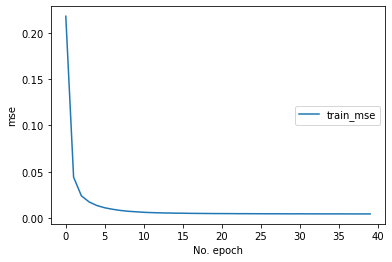

4_layer_dropout


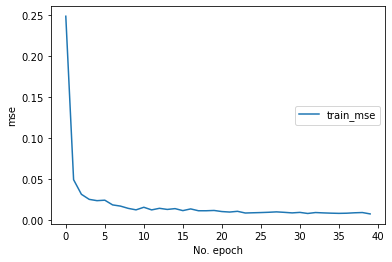

5_layer


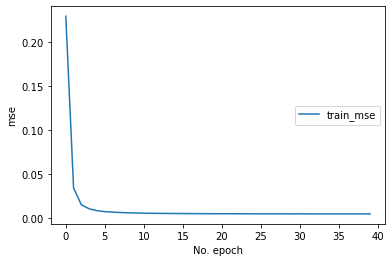

5_layer_dropout


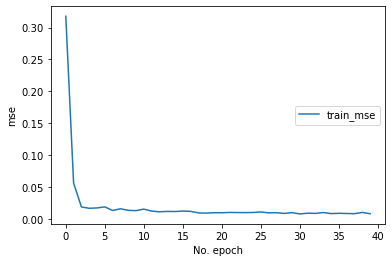

3_layer_from_1b_q2


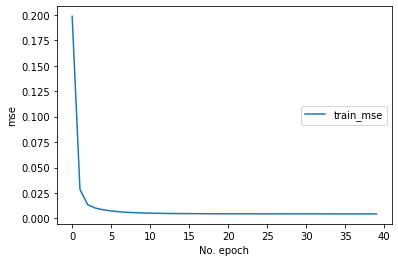

In [17]:
for model_name in histories.keys():
    print(model_name)
    plot_history_object(histories, model_name, 'mse')

Let's zoom in, since they converged so quickly

4_layer


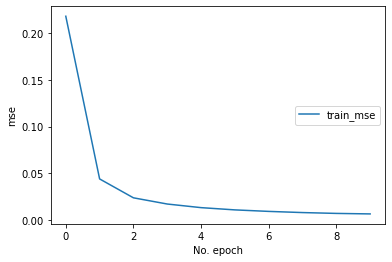

4_layer_dropout


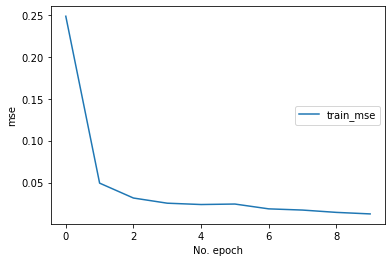

5_layer


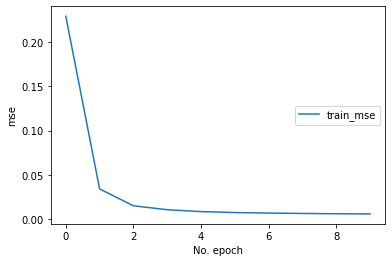

5_layer_dropout


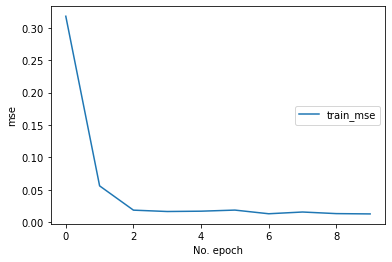

3_layer_from_1b_q2


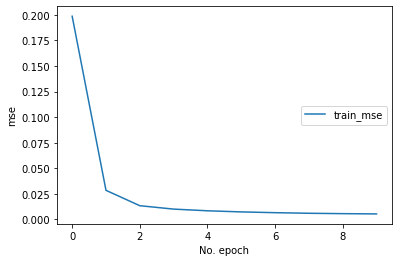

In [18]:
for model_name in histories.keys():
    print(model_name)
    plot_history_object(histories, model_name, 'mse', max=10)

### Comparing Models <a name="comparing_models"></a> 
[Back to top](#toc)

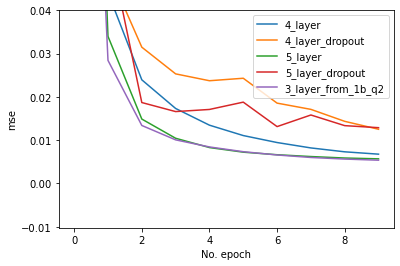

In [19]:
for model_name in histories.keys():
    plt.plot(histories[model_name]['mse'][:10], label=model_name)
plt.ylim(top=0.04)
plt.ylabel('mse')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

> 5-layer is better

We see that a 5-layer network is better than both 3-layer, and 4-layer network. However, it should be noted that the 3-layer model uses a different number of neurons and has no dropout

> Almost no difference though between 3,4,5 layers though

Although the model is better, it is not better by much. The reduced feature space only has one feature. Stacking more layers onto just one feature will likely produce no tangible benefits as there is only so much to learn about the data 

> We also notice that dropout does not help as much as we thought

Likely because of the small dataset (280 rows for train, 120 for test), and the single feature of ```CGPA```.  The model might not have had enough data to learn from, yet we continue to introduce dropout resulting in it losing information, instead of preventing overfitting. 


### Eyeballing Network and Dropout <a name="eyeballing_network_and_dropout"></a> 
[Back to top](#toc)
    
Looks like 5-layer network without dropout is the best

# Conclusion <a name="conclusion"></a> 
[Back to top](#toc)

> Optimal model is with a 5-layer network with 50 neurons/layer, no dropout

Of course, this combination is due to the question. There might be better networks, just that we have not tried the combinations yet

### Try Test Set <a name="try_test_set"></a> 
[Back to top](#toc)

We shall use a truncated ```X_test``` to check the performance of the model on the test set, by only using the ```CGPA``` column

In [25]:
print('\nmodel_4_layer')
print(model_4_layer.evaluate(X_test_truncated, Y_test, verbose=2))
print('\nmodel_4_layer_dropout')
print(model_4_layer_dropout.evaluate(X_test_truncated, Y_test, verbose=2))
print('\nmodel_5_layer')
print(model_5_layer.evaluate(X_test_truncated, Y_test, verbose=2))
print('\nmodel_5_layer_dropout')
print(model_5_layer_dropout.evaluate(X_test_truncated, Y_test, verbose=2))


model_4_layer
4/4 - 0s - loss: 0.3540 - mse: 0.0059
[0.35400182008743286, 0.005890339612960815]

model_4_layer_dropout
4/4 - 0s - loss: 0.3428 - mse: 0.0060
[0.3428317904472351, 0.005990220233798027]

model_5_layer
4/4 - 0s - loss: 0.6828 - mse: 0.0059
[0.6827687621116638, 0.005943752359598875]

model_5_layer_dropout
4/4 - 0s - loss: 0.6881 - mse: 0.0064
[0.6880671381950378, 0.006425322033464909]


> model_4_layer has the best test_set mse 

This might suggest that a 4-layer network actually generalizes better than 5-layer network. However, the difference is very negligible. 

We continue to see dropout not working for us. 